# Hyper-Parameter Tuning # Hidden Layers

In [1]:
# Importing all the modules and functions related to constructing MLP network models

from network.net import Net                   # Net class, base class for constructing MLP networks
from network.layer import Linear              # Linear class, child class of parent class Layer 
from network.loss import CrossEntropyLoss     # CrossEntropyLoss class, child class of parent class Loss
from network.activ import ReLU, LeakyReLU     # ReLU, LeakyReLU classes, child classes of parent class Activation
from network.optim import SGD, Adam           # SGD, Adam classes, child classes of parent class Optimizer

In [2]:
# Importing all the modules and functions related to data processing including loaders for the assignment data

# Process module contains functions relating to data processing:
from network.loader.process import (
    train_test_split,        # Function to split data with chosen ratio, data can be shuffled
    normalize,               # Normalizes data to have mean of zero and unit variance
    standardize,             # Normalizes data to be between range 0-1, i.e. standardizes data
    one_hot,                 # One hot encoding: 100% prob of 2 is [0, 0, 1] with 3 classes
    pca                      # Reduces data to chosen K principal components
) 

# Data module for loading the assignment data
from network.dataset.source import (
    get_data_from_file,   # Loads assignment data from file (must be within main directory)
    get_data_from_url     # Loads assignment data from public GitHub repo that stores data
)

# Data loader module for automating processing of and loading of assignment data based on parameter selections
from network.loader.data_loader import load_train_val_test  # Parameter selections decide method of processing

import numpy as np
import matplotlib.pyplot as pl
import pandas as pd 
import seaborn as sns

# setting random seed
np.random.seed(123)

In [3]:
def plot_results(stats):
    ep, tl, ta, vl, va = stats
    pl.figure(figsize = (10, 7))

    fig, ((ax1, ax2), (ax3, ax4)) = pl.subplots(2, 2)
    fig.suptitle(f'Training Results, best model found @ Epoch {ep}')

    ax1.plot(tl)
    ax1.set_title('Training Loss')

    ax2.plot(vl, 'tab:orange')
    ax2.set_title('Validation Loss')

    ax3.plot(ta, 'tab:green')
    ax3.set_title('Training Accuracy')

    ax4.plot(va, 'tab:red')
    ax4.set_title('Validation Accuracy')
    
    for ax in fig.get_axes():
        ax.label_outer()

    pl.show()

# Note as we are loading data from URL it will take longer than from file.
train_set, valid_set, test_set = load_train_val_test(
    source = "url", method = "standardize", pca_N = 0, n_categories = 10, ratio = 0.2, shuffle = True
)         

## Current Best Model

In [4]:
mlp = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

mlp.add(Linear(128, 1024, dropout=0.4))
mlp.add(ReLU())
mlp.add(Linear(1024, 512, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(512, 64, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(64, 16, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(16, 10))  


mlp.set_name("Adam_network")
print(f"{mlp.model_name} is initialized and ready to be trained.")

Adam_network is initialized and ready to be trained.


## 0: Train and Evaluate Current Best Model

In [5]:
best = mlp.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

  1%|█▍                                                                                                                                           | 1/100 [00:07<11:59,  7.27s/it]

Epoch: 0	Interval Time: 7.3 sec(s)	Training Loss: 2.213828		Training Accuracy: 0.226825
						Validation Loss:1.867397	Validation Accuracy: 0.350100


  6%|████████▍                                                                                                                                    | 6/100 [00:43<11:17,  7.21s/it]

Epoch: 5	Interval Time: 36.1 sec(s)	Training Loss: 1.574976		Training Accuracy: 0.458350
						Validation Loss:1.481806	Validation Accuracy: 0.504200


 11%|███████████████▍                                                                                                                            | 11/100 [01:19<10:41,  7.21s/it]

Epoch: 10	Interval Time: 36.2 sec(s)	Training Loss: 1.417001		Training Accuracy: 0.531750
						Validation Loss:1.382571	Validation Accuracy: 0.546100


 16%|██████████████████████▍                                                                                                                     | 16/100 [01:55<09:58,  7.13s/it]

Epoch: 15	Interval Time: 35.7 sec(s)	Training Loss: 1.331786		Training Accuracy: 0.573775
						Validation Loss:1.346598	Validation Accuracy: 0.563900


 21%|█████████████████████████████▍                                                                                                              | 21/100 [02:32<09:36,  7.30s/it]

Epoch: 20	Interval Time: 37.4 sec(s)	Training Loss: 1.273557		Training Accuracy: 0.604275
						Validation Loss:1.315492	Validation Accuracy: 0.576700


 26%|████████████████████████████████████▍                                                                                                       | 26/100 [03:08<08:50,  7.16s/it]

Epoch: 25	Interval Time: 35.9 sec(s)	Training Loss: 1.231234		Training Accuracy: 0.628075
						Validation Loss:1.314901	Validation Accuracy: 0.579400


 31%|███████████████████████████████████████████▍                                                                                                | 31/100 [03:44<08:18,  7.22s/it]

Epoch: 30	Interval Time: 36.4 sec(s)	Training Loss: 1.193900		Training Accuracy: 0.647725
						Validation Loss:1.301203	Validation Accuracy: 0.587400


 36%|██████████████████████████████████████████████████▍                                                                                         | 36/100 [04:23<08:09,  7.65s/it]

Epoch: 35	Interval Time: 38.9 sec(s)	Training Loss: 1.168793		Training Accuracy: 0.659200
						Validation Loss:1.301198	Validation Accuracy: 0.583700


 41%|█████████████████████████████████████████████████████████▍                                                                                  | 41/100 [05:04<07:52,  8.01s/it]

Epoch: 40	Interval Time: 40.4 sec(s)	Training Loss: 1.150525		Training Accuracy: 0.668050
						Validation Loss:1.294413	Validation Accuracy: 0.587600


 46%|████████████████████████████████████████████████████████████████▍                                                                           | 46/100 [05:50<08:14,  9.16s/it]

Epoch: 45	Interval Time: 46.2 sec(s)	Training Loss: 1.126710		Training Accuracy: 0.677550
						Validation Loss:1.291413	Validation Accuracy: 0.593300


 50%|██████████████████████████████████████████████████████████████████████                                                                      | 50/100 [06:32<06:32,  7.85s/it]

Epoch: 50	Interval Time: 42.2 sec(s)	Training Loss: 1.109057		Training Accuracy: 0.688575
						Validation Loss:1.292969	Validation Accuracy: 0.592400


Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 50.
Total training time: 6 min 32.5 s

                Best model found @ Epoch 45
                --------------------------------------------
                Training Loss: 1.126710
                Validation Loss: 1.291413
                --------------------------------------------
                Training Accuracy: 0.677550
                Validation Accuracy: 0.593300


Best model 'Adam_network' saved in 'model/' directory.


{'tags': ['hide-output']}

<Figure size 720x504 with 0 Axes>

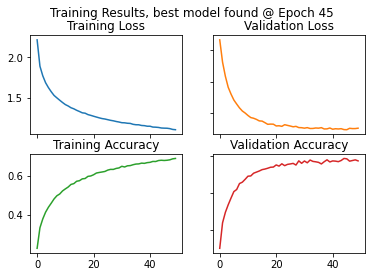

In [6]:
plot_results(best)

In [7]:
# Loading best model found:

best_model = Net.load_model("model/" + mlp.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

-------------------------------------------
Accuracy on train data: 86.06%
Total Count:  40000
Total Match:  34425
-------------------------------------------
Test Accuracy of	0: 92.75% (3737/4029)
Test Accuracy of	1: 80.45% (3235/4021)
Test Accuracy of	2: 76.63% (3052/3983)
Test Accuracy of	3: 84.88% (3356/3954)
Test Accuracy of	4: 76.94% (3083/4007)
Test Accuracy of	5: 90.69% (3655/4030)
Test Accuracy of	6: 90.49% (3665/4050)
Test Accuracy of	7: 91.00% (3620/3978)
Test Accuracy of	8: 88.53% (3527/3984)
Test Accuracy of	9: 88.17% (3495/3964)
-------------------------------------------
Accuracy on valid data: 59.33%
Total Count:  10000
Total Match:  5933
-------------------------------------------
Test Accuracy of	0: 73.12% (710/971)
Test Accuracy of	1: 45.45% (445/979)
Test Accuracy of	2: 40.31% (410/1017)
Test Accuracy of	3: 54.49% (570/1046)
Test Accuracy of	4: 44.61% (443/993)
Test Accuracy of	5: 67.63% (656/970)
Test Accuracy of	6: 65.37% (621/950)
Test Accuracy of	7: 73.09% (747/

# 1: Removing a layer

Note: need to ensure output dims match input dims of next layer:

### Scenario A

In [8]:
remA = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

remA.add(Linear(128, 1024, dropout=0.4))
remA.add(ReLU())
remA.add(Linear(1024, 512, dropout=0.2))
remA.add(ReLU())
remA.add(Linear(512, 16, dropout=0.2))
remA.add(ReLU())
#mlp.add(Linear(64, 16, dropout=0.2))   # removing this layer
#mlp.add(ReLU())
remA.add(Linear(16, 10))  

### Train and Evaluate Scenario A

In [9]:

remA.set_name("remA")
print(f"{mlp.model_name} is initialized and ready to be trained.")

remAT = remA.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

Adam_network is initialized and ready to be trained.


  1%|█▍                                                                                                                                           | 1/100 [00:07<12:23,  7.51s/it]

Epoch: 0	Interval Time: 7.5 sec(s)	Training Loss: 2.024905		Training Accuracy: 0.273700
						Validation Loss:1.750469	Validation Accuracy: 0.396800


  6%|████████▍                                                                                                                                    | 6/100 [00:44<11:45,  7.51s/it]

Epoch: 5	Interval Time: 37.0 sec(s)	Training Loss: 1.515017		Training Accuracy: 0.489375
						Validation Loss:1.474686	Validation Accuracy: 0.510900


 11%|███████████████▍                                                                                                                            | 11/100 [01:22<10:51,  7.32s/it]

Epoch: 10	Interval Time: 37.7 sec(s)	Training Loss: 1.378228		Training Accuracy: 0.550250
						Validation Loss:1.378452	Validation Accuracy: 0.549300


 16%|██████████████████████▍                                                                                                                     | 16/100 [01:58<10:07,  7.23s/it]

Epoch: 15	Interval Time: 36.0 sec(s)	Training Loss: 1.304036		Training Accuracy: 0.583700
						Validation Loss:1.349824	Validation Accuracy: 0.568500


 21%|█████████████████████████████▍                                                                                                              | 21/100 [02:35<09:43,  7.39s/it]

Epoch: 20	Interval Time: 36.9 sec(s)	Training Loss: 1.257405		Training Accuracy: 0.606800
						Validation Loss:1.334707	Validation Accuracy: 0.575000


 24%|█████████████████████████████████▌                                                                                                          | 24/100 [03:04<09:45,  7.71s/it]



Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 24.
Total training time: 3 min 5.0 s

                Best model found @ Epoch 24
                --------------------------------------------
                Training Loss: 1.238887
                Validation Loss: 1.319198
                --------------------------------------------
                Training Accuracy: 0.614475
                Validation Accuracy: 0.577400


Best model 'remA' saved in 'model/' directory.


{'tags': ['hide-output']}

<Figure size 720x504 with 0 Axes>

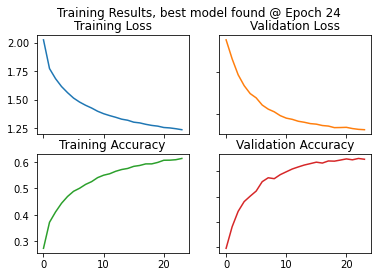

In [10]:
plot_results(remAT)

In [11]:
# Loading best model found:

best_model = Net.load_model("model/" + remAT.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

AttributeError: 'tuple' object has no attribute 'model_name'

### Scenario B

In [ ]:
remB = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

remB.add(Linear(128, 1024, dropout=0.4))
remB.add(ReLU())
remB.add(Linear(1024, 64, dropout=0.2))
remB.add(ReLU())
#remB.add(Linear(512, 16, dropout=0.2))  # removing this layer
#remB.add(ReLU())
remB.add(Linear(64, 16, dropout=0.2))   
remB.add(ReLU())
remB.add(Linear(16, 10))

### Train and Evaluate Scenario B

In [ ]:
remB.set_name("remB")
print(f"{mlp.model_name} is initialized and ready to be trained.")

remB_stat = remB.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

In [ ]:
plot_results(remB_stat)

In [ ]:
# Loading best model found:

best_model = Net.load_model("model/" + remB.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

### Scenario C

In [ ]:
remC = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

remC.add(Linear(128, 1024, dropout=0.4))
remC.add(ReLU())
#remC.add(Linear(1024, 64, dropout=0.2))   # removing this layer
#remC.add(ReLU())
remC.add(Linear(1024, 64, dropout=0.2))  
remC.add(ReLU())
remC.add(Linear(64, 16, dropout=0.2))   
remC.add(ReLU())
remC.add(Linear(16, 10))

### Train and Evaluate Scenario C

In [ ]:

remC.set_name("remC")
print(f"{remC.model_name} is initialized and ready to be trained.")

remC_stat = remC.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

In [ ]:
plot_results(remC_stat)

In [ ]:
# Loading best model found:

best_model = Net.load_model("model/" + remC.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

# 2: Adding a Layer

For consistency, let's choose an output dimension for an added hidden layer to be half the size of the output dims in the previous layer.

### Scenario A

In [ ]:
mlp = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

mlp.add(Linear(128, 1024, dropout=0.4))
mlp.add(ReLU())
mlp.add(Linear(1024, 512, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(512, 64, dropout=0.2))
mlp.add(ReLU())
# Adding layer
mlp.add(Linear(64, 32, dropout=0.2))  # half above output
mlp.add(ReLU())
mlp.add(Linear(32, 16, dropout=0.2))  # reduce 64 to match 32
mlp.add(ReLU())
mlp.add(Linear(16, 10))  


mlp.set_name("Adam_network")
print(f"{mlp.model_name} is initialized and ready to be trained.")

### Train and Evaluate Scenario A

In [ ]:

mlp.set_name("add")
print(f"{mlp.model_name} is initialized and ready to be trained.")

addA = mlp.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

In [ ]:
plot_results(add_stat)

In [ ]:
# Loading best model found:

best_model = Net.load_model("model/" + mlp.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

### Scenario B

In [ ]:
mlp = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

mlp.add(Linear(128, 1024, dropout=0.4))
mlp.add(ReLU())
mlp.add(Linear(1024, 512, dropout=0.2))
mlp.add(ReLU())
# adding layer
mlp.add(Linear(512, 64, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(64, 32, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(32, 16, dropout=0.2))  
mlp.add(ReLU())
mlp.add(Linear(16, 10))  


mlp.set_name("Adam_network")
print(f"{mlp.model_name} is initialized and ready to be trained.")

### Train and Evaluate Scenario B

In [ ]:

mlp.set_name("add2")
print(f"{mlp.model_name} is initialized and ready to be trained.")

addB = mlp.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

In [ ]:
plot_results(add_stat)

In [ ]:
# Loading best model found:

best_model = Net.load_model("model/" + mlp.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

## Scenario C

In [ ]:
mlp = Net(
    optimizer = Adam(),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

mlp.add(Linear(128, 1024, dropout=0.4))
mlp.add(ReLU())
# adding layer
mlp.add(Linear(1024, 512, dropout=0.4))
mlp.add(ReLU())
mlp.add(Linear(512, 128, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(128, 32, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(32, 16, dropout=0.2))  
mlp.add(ReLU())
mlp.add(Linear(16, 10))  


mlp.set_name("Adam_network")
print(f"{mlp.model_name} is initialized and ready to be trained.")

## Train and Evaluate Scenario C

In [ ]:

mlp.set_name("add3")
print(f"{mlp.model_name} is initialized and ready to be trained.")

addC = mlp.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

In [ ]:
plot_results(add_stat)

In [ ]:
# Loading best model found:

best_model = Net.load_model("model/" + mlp.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")